4-ExamplePythonAPI_CartPole.ipynb

    v1.0  aaaa-mm-jj  JLC  Innitial version
    v1.1  2020-12-08  JLC  Adaptation V-Rep -> CoppelaSim

## API Python CoppeliaSim

This notebook imports 2 modules from the directory `coppeliasim/env` :
- sim.py
- simConst.py 

It also needs the appropriate remote API library: "remoteApi.dll" (Windows), "remoteApi.dylib" (Mac) or "remoteApi.so" (Linux)

The CoppeliaSim Python API is documented here: http://www.coppeliarobotics.com/helpFiles/en/remoteApiFunctionsPython.htm

The cell bellow finds the relative path of the directory `coppeliasim_api/env` where the modules `sim` and `simConst` live:<br>
if not found in the current working dir it tries recursively to find a parent directory that holds `coppeliasim/env`.<br>
When found, it sets `root_dir` to this value and adds relevant paths to the list sys.path:

In [3]:
import sys, os, time

# initialize default path values:
target_dir = "coppeliasim_api/env"
root_dir = os.getcwd()
copsim_env_path = target_dir

if not os.path.isdir(target_dir):
    while not os.path.isdir(copsim_env_path):
        copsim_env_path = os.path.join('..', copsim_env_path)
    root_dir = copsim_env_path.replace(target_dir, "")

# run notebook in root dir and add the required paths to sys.path:
if  root_dir !=  os.getcwd():  
    os.chdir(root_dir)
    sys.path.append(root_dir)
    sys.path.append(target_dir)

print(f"\troot directory: <{root_dir}>")
print(f"\tworking directory is now: <{os.getcwd()}>")

# automatic reload of modules when modification
%load_ext autoreload
%autoreload 2

	root directory: <../../>
	working directory is now: </home/jlc/work/ENSAM/Projets/Mini-Apterros/gitlab.com/miniapterros>


In [4]:
try:
    import sim
except:
    print ('--------------------------------------------------------------')
    print ('"sim.py" could not be imported.')
    print ('--------------------------------------------------------------')
    print ('')
    raise

import time, sys
import numpy as np
from CopSim import Simulator

error_mess = 'Remote API error code: '
OK = sim.simx_return_ok

opmode_blocking    = sim.simx_opmode_blocking
opmode_oneshot     = sim.simx_opmode_oneshot
opmode_buffer      = sim.simx_opmode_buffer
opmode_streaming   = sim.simx_opmode_streaming
opmode_discontinue = sim.simx_opmode_discontinue

np.set_printoptions(precision=3)

## >>> Automatic launch of a CoppeliaSim instance:

**Only for Linux** !!! <br>
=> Windows & Mac : run CoppeliaSim "by hand" and go to the cell "Connection to the CoppeliaSim simulator...<br><br>
The file `constants.py` in `coppeliasim_api/env` sets COPSIM_DIR to the name of the CoppeliaSim installation directory... modify it as needed.

In [ ]:
import platform
if platform.system() =='Linux':
    # LINUX CUSTOMIZE : the file 'constants.py' from 'coppeliasim_api/env' sets COPSIM_DIR 
    # to the name of the CoppeliaSim installation directory : modify it as needed...
    from constants import COPSIM_DIR
    print(f"CoppeliaSim installation found in directory <{COPSIM_DIR}>")
    simulator = Simulator(19997, COPSIM_DIR, headless=False, verbose=1)
    simulator.start()
else:
    print("""Only for Linux platform !!!
Windows & Mac : run CoppeliaSim "by hand" and go to the cell "Connection to the CoppeliaSim simulator...""")    

## Connection to the CoppeliaSim simulator:

In [ ]:
sim.simxFinish(-1) # just in case, close all opened connections

clientID = sim.simxStart('127.0.0.1',19997,True,True,5000,5) # Connect to CoppeliaSim

if clientID == -1:
    print ('NOT Connected to remote API server')
    sys.exit("Could not connect")
else:
    print ('Successfully connected to the remote CoppeliaSim server with clientID={}'.format(clientID))

## API-Python : function simxLoadScene

## simxLoadScene

In [ ]:
scene = "./cartpole/copsim/CartPole-v3.1_2021.ttt"
res = sim.simxLoadScene(clientID, scene, 0xFF, opmode_blocking)
if res == OK:
    print ('Scene <{}> successfully loaded !'.format(scene))
else:
    print (error_mess, res)

### How to get the handles for the "Slider", "Cart", "Joint" and "Pole" objects:

In [ ]:
res, slider_handle = sim.simxGetObjectHandle(clientID, "Slider", opmode_blocking)
if res != OK: print (error_mess, res)
    
res, cart_handle = sim.simxGetObjectHandle(clientID, "Cart", opmode_blocking)
if res != OK: print (error_mess, res)
    
res, joint_handle = sim.simxGetObjectHandle(clientID, "Joint", opmode_blocking)
if res != OK: print (error_mess, res)
    
res, pole_handle = sim.simxGetObjectHandle(clientID, "Pole", opmode_blocking)
if res != OK: print (error_mess, res)

print ('Handle on "Slider": ', slider_handle)
print ('Handle on "Cart": ', cart_handle)
print ('Handle on "Joint": ', joint_handle)
print ('Handle on "Pole": ', pole_handle)

## Check the "Slider joint" (liaison glissière)

In [ ]:
res, val = sim.simxGetJointPosition(clientID, slider_handle, opmode_blocking)
if res == OK:
    print(f"Slider initial position: {val:.2f}")
else:
    print (error_mess, res)

In [ ]:
res = sim.simxSetJointPosition(clientID, slider_handle, 0.1, opmode_oneshot)
res, pos = sim.simxGetObjectPosition(clientID, cart_handle, -1, opmode_blocking)
print("position:", pos)
time.sleep(1)

res = sim.simxSetJointPosition(clientID, slider_handle, -0.1, opmode_oneshot)
res, pos = sim.simxGetObjectPosition(clientID, cart_handle, -1, opmode_blocking)
print("position:", pos)
time.sleep(1)

res = sim.simxSetJointPosition(clientID, slider_handle, 0.1, opmode_oneshot)
res, pos = sim.simxGetObjectPosition(clientID, cart_handle, -1, opmode_blocking)
print("position:", pos)
time.sleep(1)

res = sim.simxSetJointPosition(clientID, slider_handle, 0., opmode_oneshot)
res, pos = sim.simxGetObjectPosition(clientID, cart_handle, -1, opmode_blocking)
print("position:", pos)
time.sleep(1)


In [ ]:
res, linVelocity, angVelocity = sim.simxGetObjectVelocity(clientID, slider_handle, opmode_oneshot)
print("linearVelocity",linVelocity)
print("angularVelocity",angVelocity)

### Full exploration of the slider displacement along + or - 35 cm 
(*without any physical simualion => only a geometrical displacement to check the slider cinematic*)

In [ ]:
res = sim.simxSetJointPosition(clientID, slider_handle, 0, opmode_oneshot)
for d in np.arange(-0.35,0.35+0.01,0.01):
    res = sim.simxSetJointPosition(clientID, slider_handle, d, opmode_oneshot)
    if res != OK: print (error_mess, res)
    print("{:6.1f} mm\r".format(d*1000), end="")
    time.sleep(0.1)
res = sim.simxSetJointPosition(clientID, slider_handle, 0, opmode_oneshot)

  ## Check the "revolute joint" ("liaison pivot")

In [ ]:
res, val = sim.simxGetJointPosition(clientID, joint_handle, opmode_blocking)
if res == OK:
    print("Joint angle: {:.1f}°".format(np.degrees(val)))
else:
    print (error_mess, res)

In [ ]:
res = sim.simxSetJointPosition(clientID, joint_handle, np.radians(0.), opmode_oneshot)
time.sleep(1)

res = sim.simxSetJointPosition(clientID, joint_handle, np.radians(45), opmode_oneshot)
time.sleep(1)

res = sim.simxSetJointPosition(clientID, joint_handle, np.radians(-45), opmode_oneshot)
time.sleep(1)

res = sim.simxSetJointPosition(clientID, joint_handle, np.radians(0.), opmode_oneshot)
time.sleep(1)

### Full exploration of the stroke of the "Revolute" joint of + or - 180 °
(*without any physical simualion => only a geometrical displacement to check the slider cinematic*)

In [ ]:
res = sim.simxSetJointPosition(clientID, joint_handle, 0, opmode_oneshot)
t0 = time.time()
for d in np.arange(0, 2.01*np.pi, np.pi/100):
    res = sim.simxSetJointPosition(clientID, joint_handle, d, opmode_oneshot)
    print("{:4.1f}°\r".format(np.degrees(d)), end="")
    time.sleep(0.05)
t1 = time.time()
res = sim.simxSetJointPosition(clientID, joint_handle, 0, opmode_oneshot)
print("\n2*pi en {:.2f} secondes -> vitesse angulaire {:.3f} rd/s ou {:.3f} °/s"\
      .format(t1-t0,2*np.pi/(t1-t0),360/(t1-t0)))

## Reset the CartPole to a given position:

In [ ]:
def reset(s=0, j=0):
    res = sim.simxSetJointPosition(clientID, slider_handle, s, opmode_oneshot)
    res = sim.simxSetJointPosition(clientID, joint_handle, j, opmode_oneshot)

In [ ]:
reset(-0.1, np.radians(-45))

In [ ]:
reset(0.1, np.radians(45))

In [ ]:
reset()

## 1/ "free run" Simulations: 

Slider [Dynamic Porperties] : `motor_enabled` + `Control loop enabled` + `Spring-damper mode`

<src img='coppeliasim_api/images/Slider-dynamic-prop_0.png' width='300'>


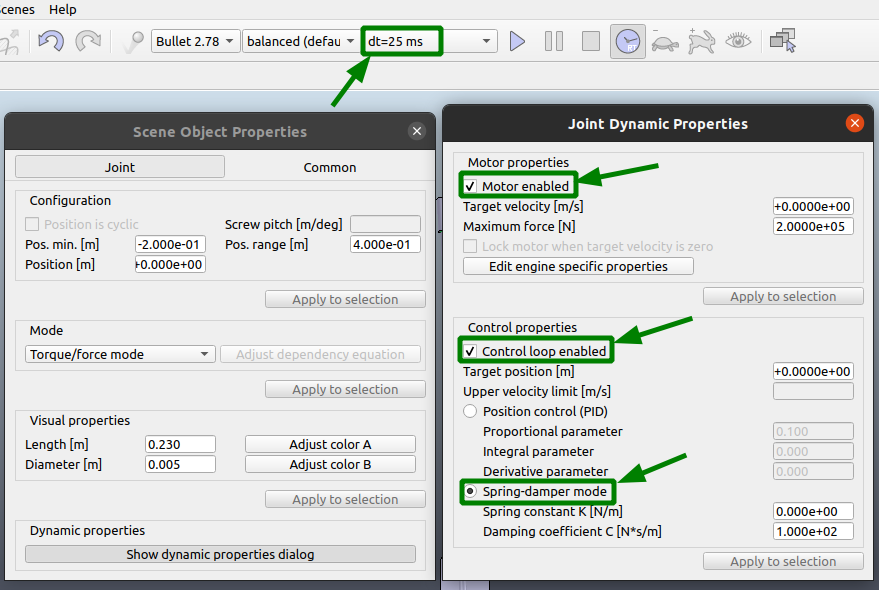

In [5]:
from IPython.display import Image
Image(filename='coppeliasim_api/images/Slider-dynamic-prop_0.png')

## 2 secondes simulation, asynchroneous reading of the Cartpole state

L'état du Cartpole est défini par le quadruplet $[x, x',\theta, \theta']$

Ici la communication est asynchrone (pas de synchronisation entre CoppeliaSim et Python) : on ne maîtrise pas quand la demande Python est traitée par CopSim.... <br />

**La simulation CopSim doit être réglée avec un pas de 25 ms.**

In [ ]:
np.set_printoptions(precision=3)

res = sim.simxSetJointPosition(clientID, joint_handle, np.radians(3), opmode_oneshot)

res, y          = sim.simxGetJointPosition(clientID, slider_handle, opmode_blocking)
res, linV, angV = sim.simxGetObjectVelocity(clientID, slider_handle, opmode_blocking)
res, theta      = sim.simxGetJointPosition(clientID, joint_handle, opmode_blocking)
res, linV, angV = sim.simxGetObjectVelocity(clientID, joint_handle, opmode_blocking)
    
res = sim.simxStartSimulation(clientID, opmode_oneshot)

M, timeSimu = [], 0
while True:
    if res == OK :
        timeSimu = sim.simxGetLastCmdTime(clientID)
        data = [timeSimu]
    else: 
        data = [0]
    
    res, y = sim.simxGetJointPosition(clientID, slider_handle, opmode_blocking)
    data.append(y)
    
    res, cart_linV, _ = sim.simxGetObjectVelocity(clientID, cart_handle, opmode_blocking)
    data.append(cart_linV[1])
    
    res, theta = sim.simxGetJointPosition(clientID, joint_handle, opmode_blocking)
    data.append(theta)
    
    res, joint_linV, joint_angV = sim.simxGetObjectVelocity(clientID, pole_handle, opmode_blocking)
    data.extend(joint_angV)
    
    M.append(data)
    time.sleep(0.025)
    
    if timeSimu >= 3000: break
        
res = sim.simxStopSimulation(clientID, opmode_oneshot)
M = np.array(M)

#np.set_printoptions(suppress=True)
print("  time [ms]     y[m]     Vy [m/s]   theta [°]    Pole angle velocity [°]")
for data in M:
    print('{:10.2f} {:10.2e} {:10.2e} {:10.2f} {:9.2f} {:9.2f} {:9.2f}'.\
        format(*data[:3], *np.degrees(data[3:])))

import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))

plt.subplot(221)
plt.plot(M[:,0]/1000,M[:,1]*1e3, '.-b', label='x [mm]')
plt.legend(loc='upper left')
plt.grid()

plt.subplot(223)
plt.plot(M[:,0]/1000,M[:,2]*1e3, '.-m', label="x' [mm/s]")
plt.xlabel('time [s]')
plt.legend(loc='upper left')
plt.grid()

plt.subplot(222)
plt.plot(M[:,0]/1000, np.degrees(M[:,3]), '.-r', label=r'$\theta$'+' [°]')
plt.ylim(0,360)
plt.legend(loc='upper left')
plt.grid()

plt.subplot(224)
#plt.ylim(0,360)
plt.plot(M[:,0]/1000, np.degrees(M[:,4]), '.-g', label=r"$\theta'$"+' [°/s]')
plt.legend(loc='upper left')
plt.xlabel('time [s]')
plt.grid()

## Simulation de 2 secondes avec streaming pour lire l'état du Cartpole 

Le **streaming** permet de stocker une requête au niveau du serveur pour déclencher l'envoi de l'état du CartPole de façon régulière.

La communication reste asynchrone (pas de synchronisation entre CoppeliaSim et Python) : si on va assez vite tout se pase bien....<br />

La simulation CoppeliaSim doit être réglée avec un pas de 25 ms.

In [ ]:
# Request for streaming operation:
sim.simxGetJointPosition(clientID, slider_handle, opmode_streaming)
sim.simxGetObjectVelocity(clientID, cart_handle, opmode_streaming)
sim.simxGetJointPosition(clientID, joint_handle, opmode_streaming)
sim.simxGetObjectVelocity(clientID, pole_handle, opmode_streaming)

res = sim.simxStartSimulation(clientID, opmode_oneshot)

M, timeSimu = [], 0
while True:
    if res == OK :
        timeSimu = sim.simxGetLastCmdTime(clientID)
        data = [timeSimu]
    else: 
        data =[0]
    print("{:4.1f} ms\r".format(timeSimu), end="")

    res, y = sim.simxGetJointPosition(clientID, slider_handle, opmode_buffer)
    if res != OK:
        # once you have enabled data streaming, it will take a few ms until the first value has arrived. So if
        # we landed in this code section, this does not always mean we have an error!!!
        pass
    data.append(y)

    res, cart_linV, pouet = sim.simxGetObjectVelocity(clientID, cart_handle, opmode_buffer)
    if res != OK:
        # once you have enabled data streaming, it will take a few ms until the first value has arrived. So if
        #we landed in this code section, this does not always mean we have an error!!!
        pass
    data.append(cart_linV[1])
    
    res, theta = sim.simxGetJointPosition(clientID, joint_handle, opmode_buffer)
    if res != OK:
        # once you have enabled data streaming, it will take a few ms until the first value has arrived. So if
        #we landed in this code section, this does not always mean we have an error!!!
        pass
    data.append(theta)
    
    res, pouet, pole_angV = sim.simxGetObjectVelocity(clientID, pole_handle, opmode_buffer)
    if res != OK:
        # once you have enabled data streaming, it will take a few ms until the first value has arrived. So if
        #we landed in this code section, this does not always mean we have an error!!!
        pass
    data.extend(pole_angV)
    
    M.append(data)
    time.sleep(0.025)
    
    if timeSimu >= 2000: break

sim.simxGetJointPosition(clientID, slider_handle, opmode_discontinue)
sim.simxGetObjectVelocity(clientID, cart_handle, opmode_discontinue)
sim.simxGetJointPosition(clientID, joint_handle, opmode_discontinue)
sim.simxGetObjectVelocity(clientID, pole_handle, opmode_discontinue)
        
res = sim.simxStopSimulation(clientID, opmode_oneshot)

M = np.array(M)

print("  time [ms]     y[m]     Vy [m/s]   theta [°]    Pole angle velocity [°]")
for data in M:
    print('{:10.2f} {:10.2e} {:10.2e} {:10.2f} {:9.2f} {:9.2f} {:9.2f}'.\
        format(*data[:3], *np.degrees(data[3:])))

import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))

plt.subplot(221)
plt.plot(M[:,0]/1000,M[:,1], '.-b', label='x [mm]')
plt.legend(loc='upper left')
plt.grid()

plt.subplot(223)
plt.plot(M[:,0]/1000,M[:,2], '.-m', label="x' [m/s]")
plt.xlabel('time [s]')
plt.legend(loc='upper left')
plt.grid()

plt.subplot(222)
plt.plot(M[:,0]/1000, np.degrees(M[:,3]), '.-r',label=r'$\theta$'+' [°]')
plt.ylim(0,360)
plt.legend(loc='upper left')
plt.grid()

plt.subplot(224)
#plt.ylim(0,360)
plt.plot(M[:,0]/1000, np.degrees(M[:,4]), '.-g',label=r"$\theta'$"+ ' [°/s]')
plt.legend(loc='upper left')
plt.xlabel('time [s]')
plt.grid()

## Simulation de 3 secondes avec lecture synchrone de l'état du Cartpole 

Le mode **synchronous** permet de piloter la simulation CoppeliaSim de façon synchrone depuis le programme Python.

À chaque appel `simxSynchronousTrigger` la simulation CoppeliaSim fait un pas, et l'on peut récupérer en streaming l'état du cartpole.

La simulation CoppeliaSim doit être réglée avec un pas de 25 ms.

In [ ]:
# Request for synchronous operation:
sim.simxSynchronous(clientID,True)

sim.simxGetJointPosition(clientID, slider_handle, opmode_streaming)
sim.simxGetObjectVelocity(clientID, cart_handle, opmode_streaming)
sim.simxGetJointPosition(clientID, joint_handle, opmode_streaming)
sim.simxGetObjectVelocity(clientID, pole_handle, opmode_streaming)

res = sim.simxStartSimulation(clientID,opmode_oneshot)

M, timeSimu = [], 0
while True:
    res = sim.simxSynchronousTrigger(clientID)
    
    if res == OK :
        timeSimu = sim.simxGetLastCmdTime(clientID)
        data = [timeSimu]
    else: 
        data =[0]
    #print("{:4.1f} ms".format(timeSimu))

    res, y = sim.simxGetJointPosition(clientID, slider_handle, opmode_buffer)
    if res != OK:
        # once you have enabled data streaming, it will take a few ms until the first value has arrived. So if
        #we landed in this code section, this does not always mean we have an error!!!
        pass
    data.append(y)

    res, cart_linV, pouet = sim.simxGetObjectVelocity(clientID, cart_handle, opmode_buffer)
    if res != OK:
        # once you have enabled data streaming, it will take a few ms until the first value has arrived. So if
        #we landed in this code section, this does not always mean we have an error!!!
        pass
    data.append(cart_linV[1])
    
    res, theta = sim.simxGetJointPosition(clientID, joint_handle, opmode_buffer)
    if res != OK:
        # once you have enabled data streaming, it will take a few ms until the first value has arrived. So if
        #we landed in this code section, this does not always mean we have an error!!!
        pass
    data.append(theta)
    
    res, pouet, pole_angV = sim.simxGetObjectVelocity(clientID, pole_handle, opmode_buffer)
    if res != OK:
        # once you have enabled data streaming, it will take a few ms until the first value has arrived. So if
        #we landed in this code section, this does not always mean we have an error!!!
        pass
    data.extend(pole_angV)

    M.append(data)
    time.sleep(0.025)
    
    if timeSimu >= 2000: break

sim.simxGetJointPosition(clientID, slider_handle, opmode_discontinue)
sim.simxGetObjectVelocity(clientID, cart_handle, opmode_discontinue)
sim.simxGetJointPosition(clientID, joint_handle, opmode_discontinue)
sim.simxGetObjectVelocity(clientID, joint_handle, opmode_discontinue)
        
sim.simxStopSimulation(clientID, opmode_oneshot)

sim.simxSynchronous(clientID,False)

M = np.array(M)

print("  time [ms]     y[m]     Vy [m/s]   theta [°]    Pole angle velocity [°]")
for data in M:
    print('{:10.2f} {:10.2e} {:10.2e} {:10.2f} {:9.2f} {:9.2f} {:9.2f}'.\
        format(*data[:3], *np.degrees(data[3:])))

T = M[:,0]/1000.

import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))

plt.subplot(221)
plt.plot(T, M[:,1], '.-b', label='x [mm]')
plt.legend(loc='upper left')
plt.grid()

plt.subplot(223)
plt.plot(T, M[:,2], '.-m', label="x' [m/s]")
plt.xlabel('time [s]')
plt.legend(loc='upper left')
plt.grid()

plt.subplot(222)
plt.plot(T, np.degrees(M[:,3]), '.-r', label=r'$\theta$'+' [°]')
plt.ylim(0,360)
plt.legend(loc='upper left')
plt.grid()

plt.subplot(224)
#plt.ylim(0,360)
plt.plot(T, np.degrees(M[:,4]), '.-g', label=r"$\theta'$"+' [°/s]')
plt.legend(loc='upper left')
plt.xlabel('time [s]')
plt.grid()

## 1/ Simulations "Physique du CartPole piloté" : 

Slider en `motor_enabled` mais  `Control loop enabled` **désactivé**

In [ ]:
# Request for synchronous operation:
sim.simxSynchronous(clientID,True)

sim.simxGetJointPosition(clientID, slider_handle, opmode_streaming)
sim.simxGetObjectVelocity(clientID, cart_handle, opmode_streaming)
sim.simxGetJointPosition(clientID, joint_handle, opmode_streaming)
sim.simxGetObjectVelocity(clientID, pole_handle, opmode_streaming)

res = sim.simxStartSimulation(clientID,opmode_oneshot);

M, timeSimu = [], 0
while True:
    res = sim.simxSynchronousTrigger(clientID)
    
    if res == OK :
        timeSimu = sim.simxGetLastCmdTime(clientID)
        data = [timeSimu]
    else: 
        data =[0]
    print("{:4.1f} ms\r".format(timeSimu), end="")

    res, x = sim.simxGetJointPosition(clientID, slider_handle, opmode_buffer)
    if res != OK:
        # once you have enabled data streaming, it will take a few ms until the first value has arrived. So if
        #we landed in this code section, this does not always mean we have an error!!!
        pass
    data.append(x*1000)

    res, cart_linV, pouet = sim.simxGetObjectVelocity(clientID, cart_handle, opmode_buffer)
    if res != OK:
        # once you have enabled data streaming, it will take a few ms until the first value has arrived. So if
        #we landed in this code section, this does not always mean we have an error!!!
        pass
    data.append(cart_linV[1]*1000)
    
    res, theta = sim.simxGetJointPosition(clientID, joint_handle, opmode_buffer)
    if res != OK:
        # once you have enabled data streaming, it will take a few ms until the first value has arrived. So if
        #we landed in this code section, this does not always mean we have an error!!!
        pass
    data.append(np.degrees(theta))
    
    res, pouet, pole_angV = sim.simxGetObjectVelocity(clientID, pole_handle, opmode_buffer)
    if res != OK:
        # once you have enabled data streaming, it will take a few ms until the first value has arrived. So if
        #we landed in this code section, this does not always mean we have an error!!!
        pass
    data.append(np.degrees(pole_angV[0]))
    
    M.append(data)
    time.sleep(0.025)
    
    if timeSimu >= 5000: break

sim.simxGetJointPosition(clientID, slider_handle, opmode_discontinue)
sim.simxGetObjectVelocity(clientID, cart_handle, opmode_discontinue)
sim.simxGetJointPosition(clientID, joint_handle, opmode_discontinue)
sim.simxGetObjectVelocity(clientID, joint_handle, opmode_discontinue)
        
sim.simxStopSimulation(clientID, opmode_oneshot)

sim.simxSynchronous(clientID,False)

M = np.array(M)
np.set_printoptions(suppress=True)


plt.figure(figsize=(12,6))

plt.subplot(121)
plt.plot(M[:,0],M[:,1],'.-b', label='x [mm]')
plt.xlabel('time [ms]')
plt.legend(loc='upper left')
plt.twinx()
plt.plot(M[:,0],M[:,2],'.-m', label="x' [mm/s]")
plt.legend(loc='lower right')
         
plt.subplot(122)
plt.plot(M[:,0],M[:,3],'.-r',label=r'$\theta$'+' [°]')
plt.ylim(0,360)
plt.xlabel('time [ms]')
plt.legend(loc='upper left')
plt.twinx()
#plt.ylim(0,360)
plt.plot(M[:,0],M[:,4],'.-g',label=r"$\theta'$"+ ' [°/s]')
plt.legend(loc='lower right');

## simxCloseScene

In [ ]:
res = sim.simxCloseScene(clientID, opmode_blocking)

 ## Close the simulator

 **Only for Linux** !!! <br>
=> Windows & Mac : close the CoppeliaSim window 'by hand'...

In [ ]:
if platform.system() =='Linux':
    simulator.end()
else:
    print("Windows & Mac : close the CoppeliaSim window 'by hand'...")